In [9]:
import zipfile
import tensorflow as tf
import numpy as np
import splitfolders
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from sklearn.model_selection import train_test_split

# Data Collecting

## Unzip Dataset

In [2]:
local_zip = 'chest_xray.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [3]:
base_dir = 'chest_xray'
os.listdir(base_dir)

['NORMAL', 'PNEUMONIA']

In [4]:
normal_dir = os.path.join(base_dir, 'NORMAL')
pneumonia_dir = os.path.join(base_dir, 'PNEUMONIA')

## Exploratory Data Analysis

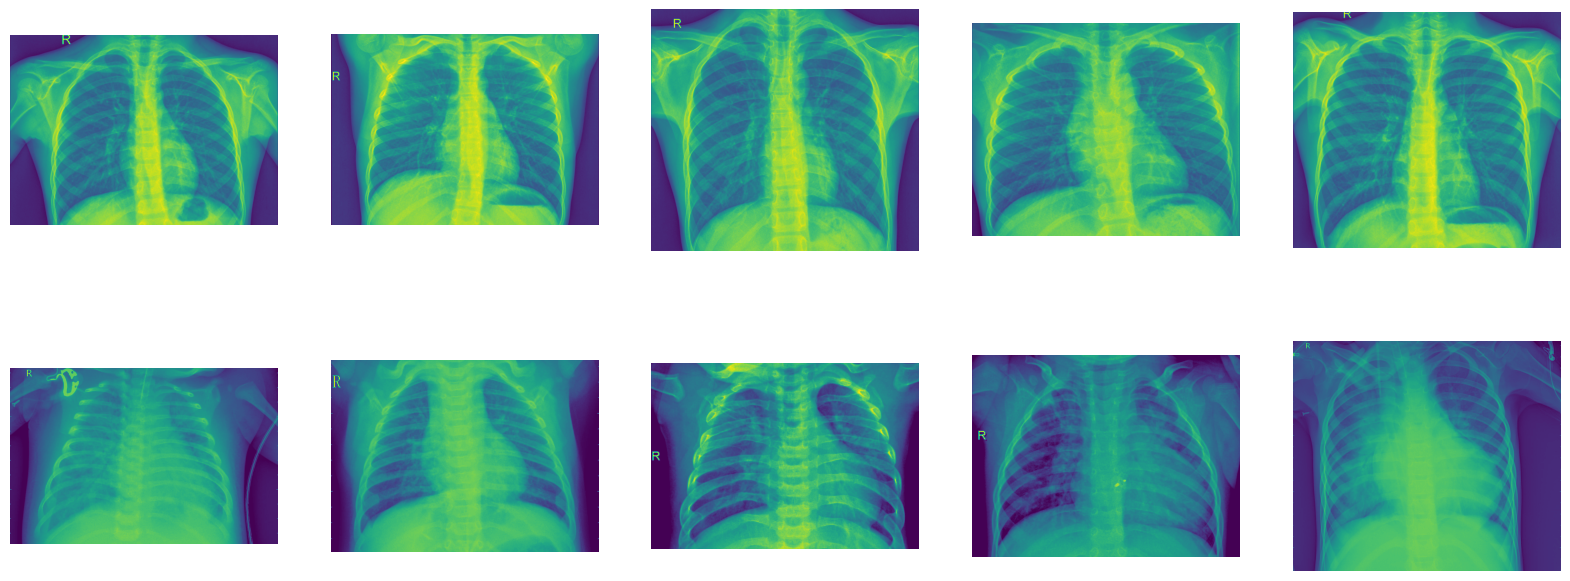

In [6]:
%matplotlib inline
files_normal = os.listdir(normal_dir)
files_pneumonia = os.listdir(pneumonia_dir)

nrows = 3
ncols = 5

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 5

images_normal = [os.path.join(normal_dir, fname)
                         for fname in files_normal[pic_index - 5:pic_index]]
images_pneumonia = [os.path.join(pneumonia_dir, fname)
                         for fname in files_pneumonia[pic_index - 5:pic_index]]

for i, img_path in enumerate(images_normal + images_pneumonia):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Data Preprocessing

## Split Data

In [7]:
base_dir = 'chest_xray'
splitfolders.ratio(base_dir, output = 'chest_xray', seed = 1337, ratio = (.6, .4))

train_dir = os.path.join('chest_xray', 'train')
validation_dir = os.path.join('chest_xray', 'val')

normal_dir = os.path.join(base_dir, 'NORMAL')
pneumonia_dir = os.path.join(base_dir, 'PNEUMONIA')

Copying files: 5856 files [00:48, 120.89 files/s]


In [10]:
# membagi direktori normal menjadi data train dan validasi data
train_normal_dir, validation_normal_dir = train_test_split(os.listdir(normal_dir), test_size = 0.4, train_size = 0.6)

# membagi direktori pneumonia menjadi data train dan validasi data
train_pneumonia_dir, validation_pneumonia_dir = train_test_split(os.listdir(pneumonia_dir), test_size = 0.4, train_size = 0.6)

In [11]:
# membuat direktori normal pada direktori data training
train_normal_dir = os.path.join(train_dir, 'normal')

# membuat direktori pneumonia pada direktori data training
train_pneumonia_dir = os.path.join(train_dir, 'pneumonia')

# membuat direktori normal pada direktori data validation
validation_normal = os.path.join(validation_dir, 'normal')

# membuat direktori pneumonia pada direktori data validation
validation_pneumonia = os.path.join(validation_dir, 'pneumonia')

## Data Augmentation

In [17]:
train_dir = base_dir + "/train"
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    fill_mode='nearest')

validation_dir = base_dir + "/val"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
  directory=train_dir,   
  target_size=(150,150), 
  class_mode='categorical',  
  shuffle=True,
  batch_size=64)

validation_generator = validation_datagen.flow_from_directory(
  directory=validation_dir,  
  target_size=(150,150),  
  class_mode='categorical',
  shuffle=True,
  batch_size=64)

Found 3512 images belonging to 2 classes.
Found 2344 images belonging to 2 classes.
